In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
#import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,263,266,271,275,280,284,290,296,301,306
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103,105,106,107,107,108,109,112,113,115


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,7839,8050,8271,8353,8457,8660,8919,9118,9361,9623


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-08-31,417735,9309,8660,203
2020-09-01,428239,10504,8919,259
2020-09-02,439172,10933,9118,199
2020-09-03,451198,12026,9361,243


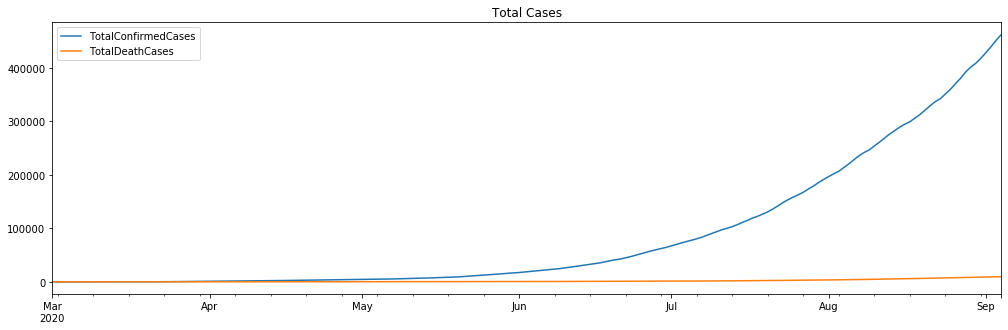

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

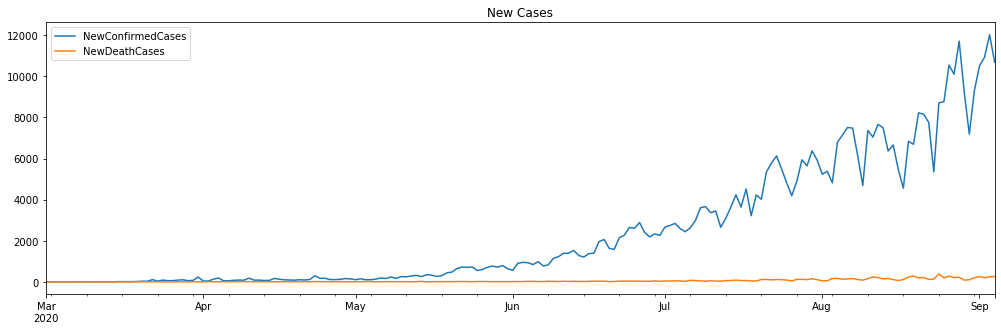

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-08-31,417735,9309
2020-09-01,428239,10504
2020-09-02,439172,10933
2020-09-03,451198,12026


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]

In [29]:
#Testing only
#data_argentina = data_argentina.head(45)

In [30]:
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [31]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-08-31,417735,9309,8660,203,184
2020-09-01,428239,10504,8919,259,185
2020-09-02,439172,10933,9118,199,186
2020-09-03,451198,12026,9361,243,187
2020-09-04,461882,10684,9623,262,188


In [32]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [33]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [34]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
#    def fiveth_pow_model(x, a, b, c, d, e, f):
#        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
#    
#    def sixh_pow_model(x, a, b, c, d, e, f, g):
#        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
#    
#    def exp_model(x, c, k):
#        return c * np.exp(k * x)

In [35]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [36]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.plot(x, model(x, *popt))
    plt.plot(x, y, 'ro')
    plt.show()

In [37]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-09-05 | 407940|
|2020-09-06 | 414351|
|2020-09-07 | 420810|
|2020-09-08 | 427316|
|2020-09-09 | 433869|
|2020-09-10 | 440470|
|2020-09-11 | 447119|
|2020-09-12 | 453814|
|2020-09-13 | 460558|
|2020-09-14 | 467349|
|2020-09-15 | 474187|
|2020-09-16 | 481073|
|2020-09-17 | 488006|
|2020-09-18 | 494986|
|2020-09-19 | 502015|
|2020-09-20 | 509090|
|2020-09-21 | 516213|
|2020-09-22 | 523384|
|2020-09-23 | 530602|
|2020-09-24 | 537867|
|2020-09-25 | 545180|
|2020-09-26 | 552541|
|2020-09-27 | 559949|
|2020-09-28 | 567404|
|2020-09-29 | 574907|
|2020-09-30 | 582457|
|2020-10-01 | 590055|
|2020-10-02 | 597700|
|2020-10-03 | 605393|
|2020-10-04 | 613133|
-------------------

 cuadratic_model
a  =  23.73426186185943
b  =  -2584.2251793752243
c  =  48547.61125766824


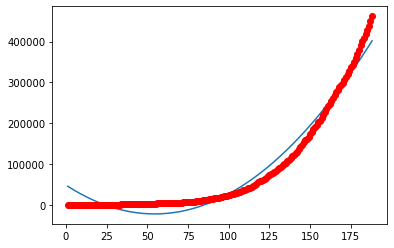

cubic_model
--- Predictions ---
|2020-09-05 | 465885|
|2020-09-06 | 475975|
|2020-09-07 | 486209|
|2020-09-08 | 496589|
|2020-09-09 | 507115|
|2020-09-10 | 517788|
|2020-09-11 | 528610|
|2020-09-12 | 539581|
|2020-09-13 | 550703|
|2020-09-14 | 561975|
|2020-09-15 | 573400|
|2020-09-16 | 584979|
|2020-09-17 | 596712|
|2020-09-18 | 608600|
|2020-09-19 | 620645|
|2020-09-20 | 632848|
|2020-09-21 | 645209|
|2020-09-22 | 657729|
|2020-09-23 | 670410|
|2020-09-24 | 683252|
|2020-09-25 | 696257|
|2020-09-26 | 709425|
|2020-09-27 | 722758|
|2020-09-28 | 736257|
|2020-09-29 | 749922|
|2020-09-30 | 763755|
|2020-10-01 | 777756|
|2020-10-02 | 791927|
|2020-10-03 | 806269|
|2020-10-04 | 820782|
-------------------

 cubic_model
a  =  0.16896478409577675
b  =  -24.167254453277515
c  =  1046.7435540150386
d  =  -9397.256563592011


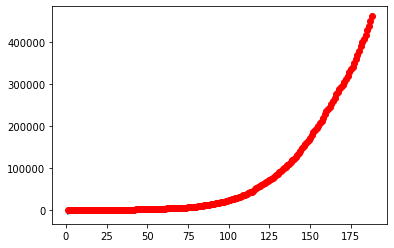

fourth_pow_model
--- Predictions ---
|2020-09-05 | 471163|
|2020-09-06 | 481812|
|2020-09-07 | 492631|
|2020-09-08 | 503623|
|2020-09-09 | 514788|
|2020-09-10 | 526130|
|2020-09-11 | 537649|
|2020-09-12 | 549347|
|2020-09-13 | 561226|
|2020-09-14 | 573287|
|2020-09-15 | 585533|
|2020-09-16 | 597965|
|2020-09-17 | 610584|
|2020-09-18 | 623392|
|2020-09-19 | 636392|
|2020-09-20 | 649585|
|2020-09-21 | 662972|
|2020-09-22 | 676555|
|2020-09-23 | 690337|
|2020-09-24 | 704318|
|2020-09-25 | 718501|
|2020-09-26 | 732888|
|2020-09-27 | 747480|
|2020-09-28 | 762278|
|2020-09-29 | 777286|
|2020-09-30 | 792504|
|2020-10-01 | 807935|
|2020-10-02 | 823580|
|2020-10-03 | 839441|
|2020-10-04 | 855520|
-------------------

 fourth_pow_model
a  =  0.0002805523673209136
b  =  0.06291598810516691
c  =  -11.259400365529793
d  =  501.24366656615496
e  =  -4119.297983748077


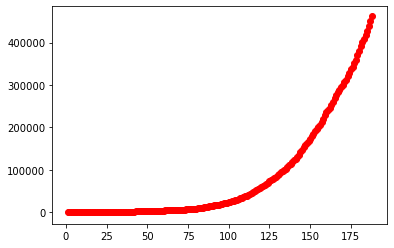

In [38]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)

----------------------------

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

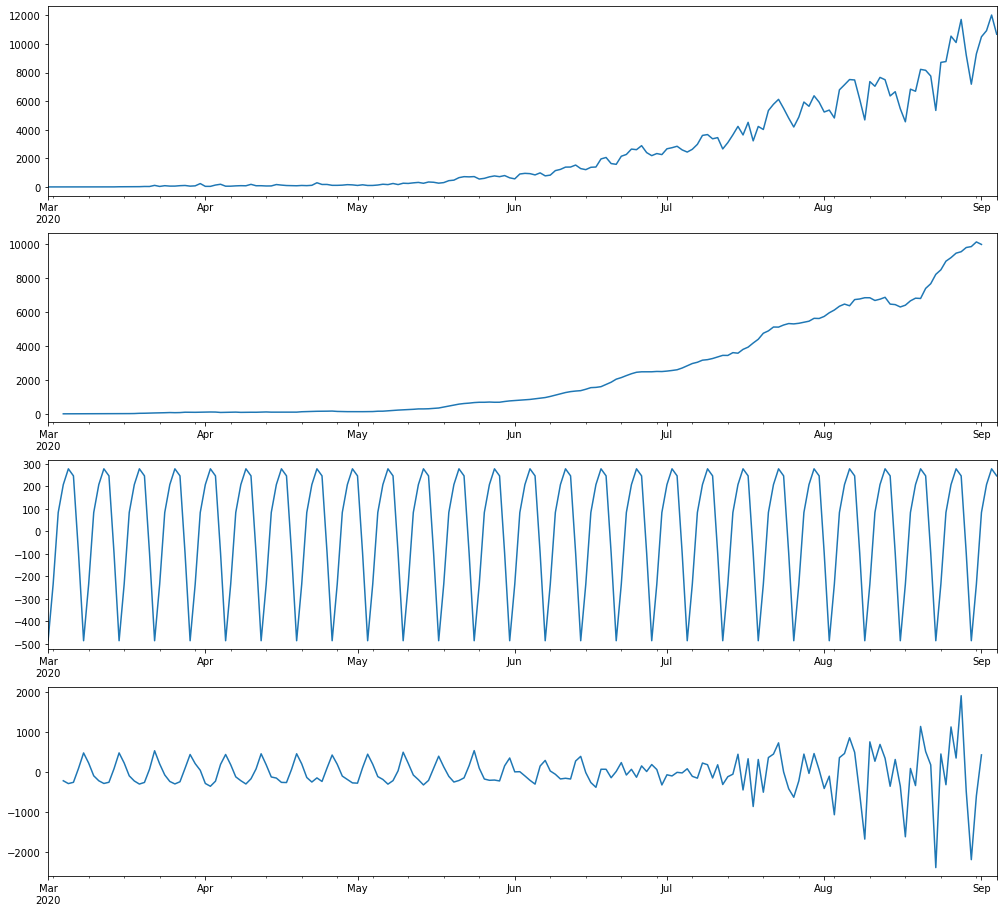

In [40]:
series = data_argentina.NewConfirmedCases
res = seasonal_decompose(series, model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17,16))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

In [41]:
data_argentina_filter_zero = data_argentina[data_argentina['NewConfirmedCases'] > 0]

In [42]:
data_argentina_filter_zero.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-03,1,1,0,0,3
2020-03-06,2,1,0,0,6
2020-03-07,8,6,0,0,7
2020-03-08,12,4,1,1,8
2020-03-09,14,2,1,0,9


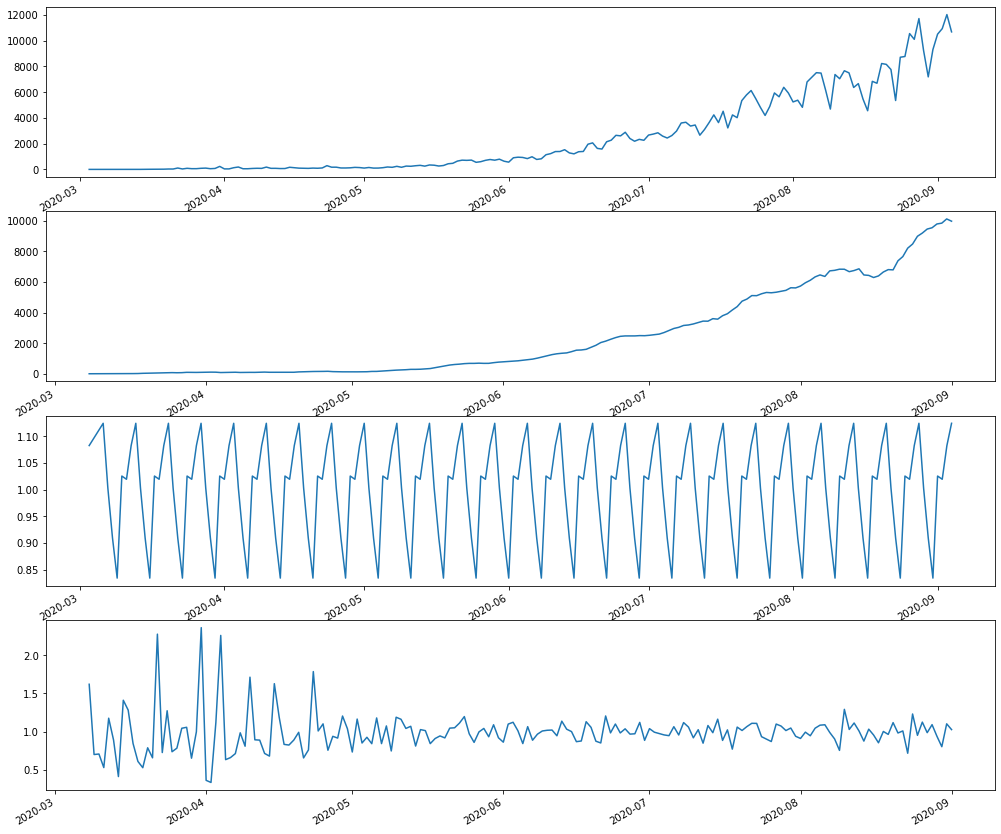

In [43]:
series = data_argentina_filter_zero.NewConfirmedCases
res = seasonal_decompose(series, model='multiplicative', freq=7)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17,16))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

------

In [ ]:
data_argentina.head(60)

In [ ]:
df_prophet_aux = data_argentina.drop(['NewConfirmedCases','TotalDeathCases','NewDeathCases','num_id'], axis=1).reset_index()
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_prophet_aux['index']
df_prophet['y'] = df_prophet_aux['TotalConfirmedCases']
df_prophet.head(60)

In [ ]:
df_prophet.columns

In [ ]:
from fbprophet import Prophet
m = Prophet(growth='logistic') # the Prophet class (model)
m.fit(df_prophet) # fit the model using all data

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction Stock Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()